# MNIST - Categorical Classification

## Overfitting Issue
- import tensorflow

In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.__version__

'2.6.0'

- GPU 설정확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# 1. MNIST Data_set Load& Review

## 1) Load MNIST Data_Set

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


- train_data information

In [5]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


- test_data information

In [6]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


## 2) Visualization

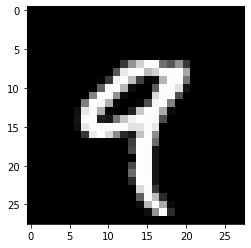

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [8]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# 2. Data preprocessing

## 1) Reshape and Normalization

- reshape
    - (60000,28,28) to (60000,784)

In [9]:
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [10]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## 2) One Hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 3. MNIST Keras Modeling

## 1) Model Define

- 모델 신경망 구조 정의
    - 2개의 Hidden Layers & 768개의 Nodes
    - 복잡한 Model Capacity로 인한 Overfitting

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

- 모델 구조 확인

In [14]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## 2) Model Compile
- 모델 학습방법 설정

In [15]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## 3) Model Fit

- 약 3분

In [16]:
%%time

Hist_mnis = mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.2534 - accuracy: 0.9224 - val_loss: 0.1160 - val_accuracy: 0.9634
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.1011 - val_accuracy: 0.9708
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0915 - val_accuracy: 0.9746
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0777 - val_accuracy: 0.9800
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.1110 - val_accuracy: 0.9725
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0955 - val_accuracy: 0.9787
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.1287 - val_accuracy: 0.9751

## 4) 학습 결과 시각화  - Overfitting

- Loss Visualization

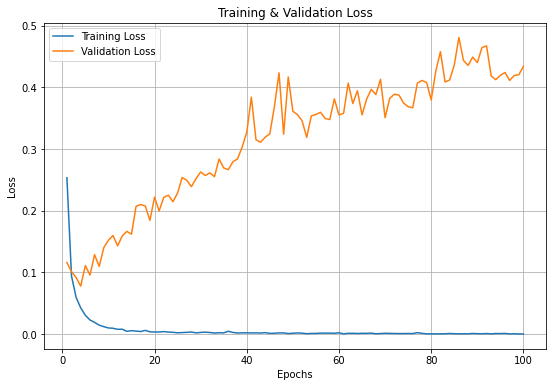

In [18]:
epochs = range(1, len(Hist_mnis.history['loss']) +1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnis.history['loss'])
plt.plot(epochs, Hist_mnis.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

## 5) Model Evaluate

- Loss & Accuracy

In [19]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.4003 - accuracy: 0.9826
Loss = 0.40031
Accuracy = 0.98260


## 6) Model Predict

- Probability

In [20]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- Class

In [21]:
print(np.argmax(mnist.predict(X_test[:1,:])))

7


# The END